# Extract and plot data along a profile
The module `polartoolkit.profiles` provides convenient tools to extract data along a profile, and automatically create plots of the results. These plots can optionally include a map, a cross section of earth layers, and a profile of other datasets.

There are 3 methods to define the location of the profile: "Points", "Shapefile", and "Polyline"

In [5]:
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, profiles, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set a temporary environment variable to tell PolarToolkit all the code in this notebook is related to the southern hemisphere, instead of the northern.

In [6]:
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

##  Method 1: "Points"
define a start and end point for a profile, in EPSG:3031 projection. See the [Defining Regions](defining_regions.ipynb) for a map with EPSG gridlines. Sample Bedmap3 layers between these points, and plot the cross section. 

In [7]:
a = (-1200e3, -1400e3)
b = (1000e3, 1400e3)

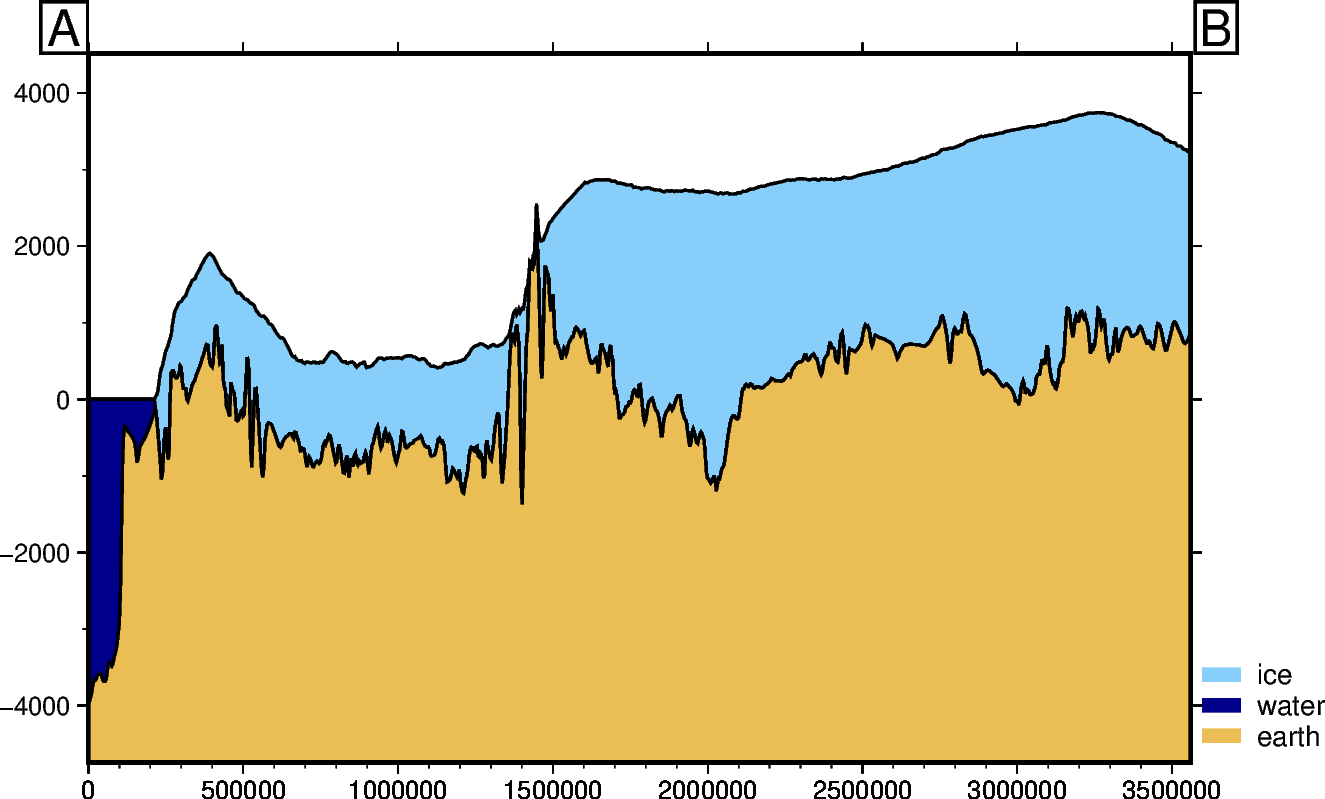

In [8]:
# this functions returns the figure as well as 2 dataframe with the sampled layers and
# sampled data
fig, df_layers, df_data = profiles.plot_profile(
    method="points",
    start=a,
    stop=b,
    layers_version="bedmap3",
)
fig.show(dpi=200)

## Method 2: "Shapefile":
Instead of using a line defined by 2 points, we can sample along the path of a shapefile. Provide a file name, or load a already included shapefile with the function `fetch`.

Here is a curved path across the Ross Ice Shelf from Mulock Glacier to the ice front through Discovery Deep.

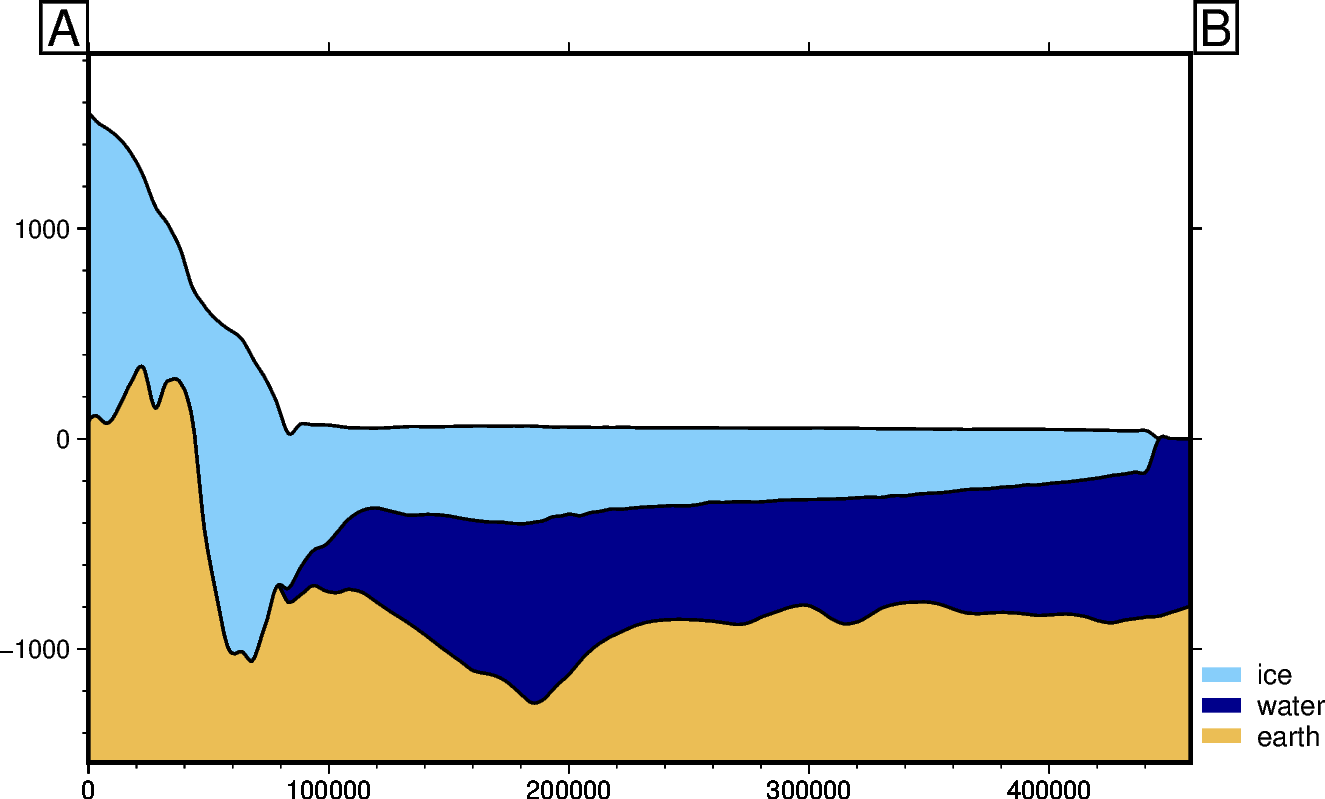

In [ ]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Method 3: "Polyline":
Alternatively, load an interactive map, click to create a line, and use that line to create the path.

Note: this requires a few optional dependencies. This can be install with:
```pip install polartoolkit[interactive]```
or installed individually with:
```mamba install geoviews cartopy ipyleaflet ipython```

The below cell will display an interactive map of Antarctica. Drag or zoom to your region of interest and use the `Draw a polyline` button to create the profile you want.

In [31]:
lines = profiles.draw_lines()

Label(value='')

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [32]:
# extract the vertices of the line
df = utils.shapes_to_df(lines)
df

lon        lat  shape_num       easting       northing
0  -55.667477 -75.383585          0 -1.318297e+06  900378.385379
1  -69.401294 -76.656104          0 -1.363074e+06  512310.826479
2  -78.584779 -78.361272          0 -1.243669e+06  251111.476716
3  -95.121853 -81.282416          0 -9.451554e+05  -84716.241453
4 -124.042832 -84.562245          0 -4.899223e+05 -330989.873262
5 -147.354165 -87.116869          0 -1.690202e+05 -263824.306612
6 -174.844467 -87.975976          0 -1.976347e+04 -219047.329391

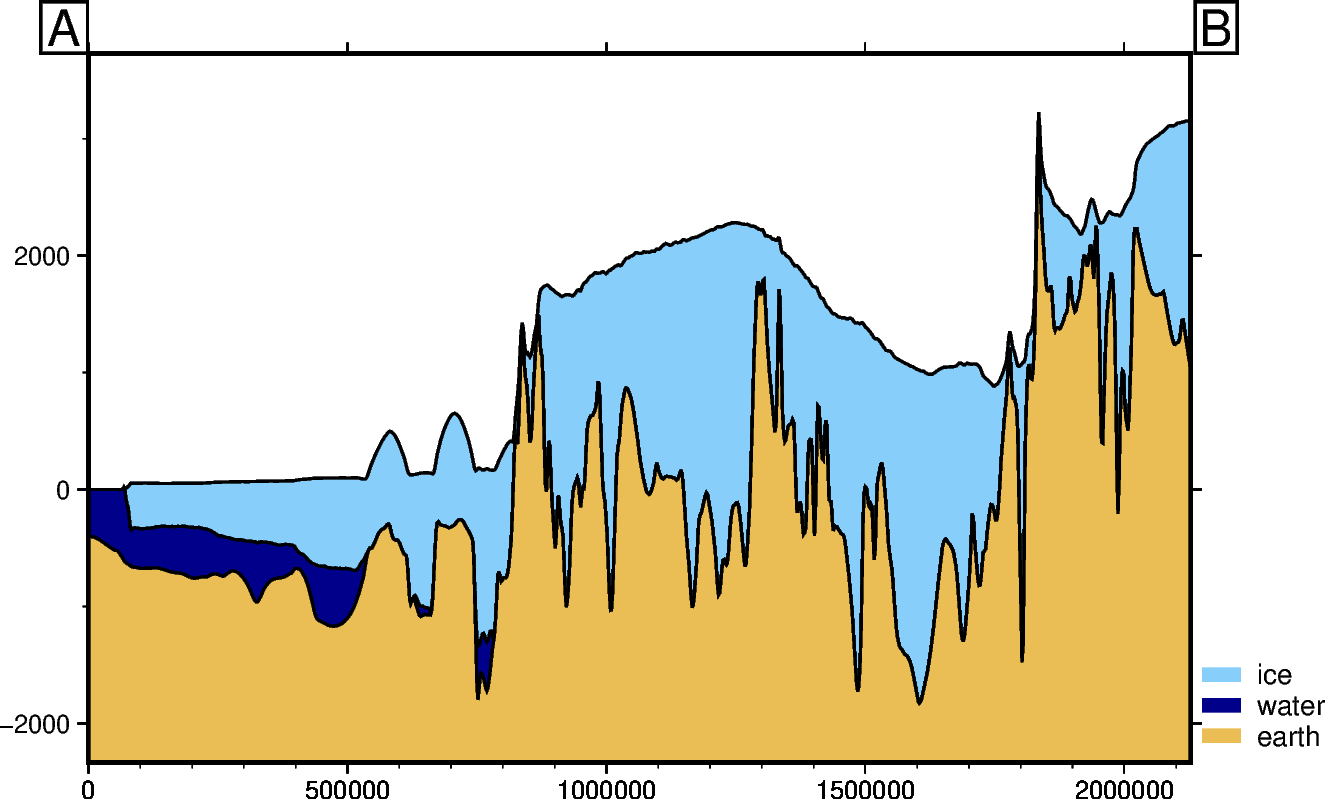

In [ ]:
# use the above line to create a profile
fig, _, _ = profiles.plot_profile(
    method="polyline",
    polyline=df,
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Add a map
show the profile location by adding a map with a default background of satellite imagery

gmtset [WARNING]: Representation of font type not recognized. Using default.


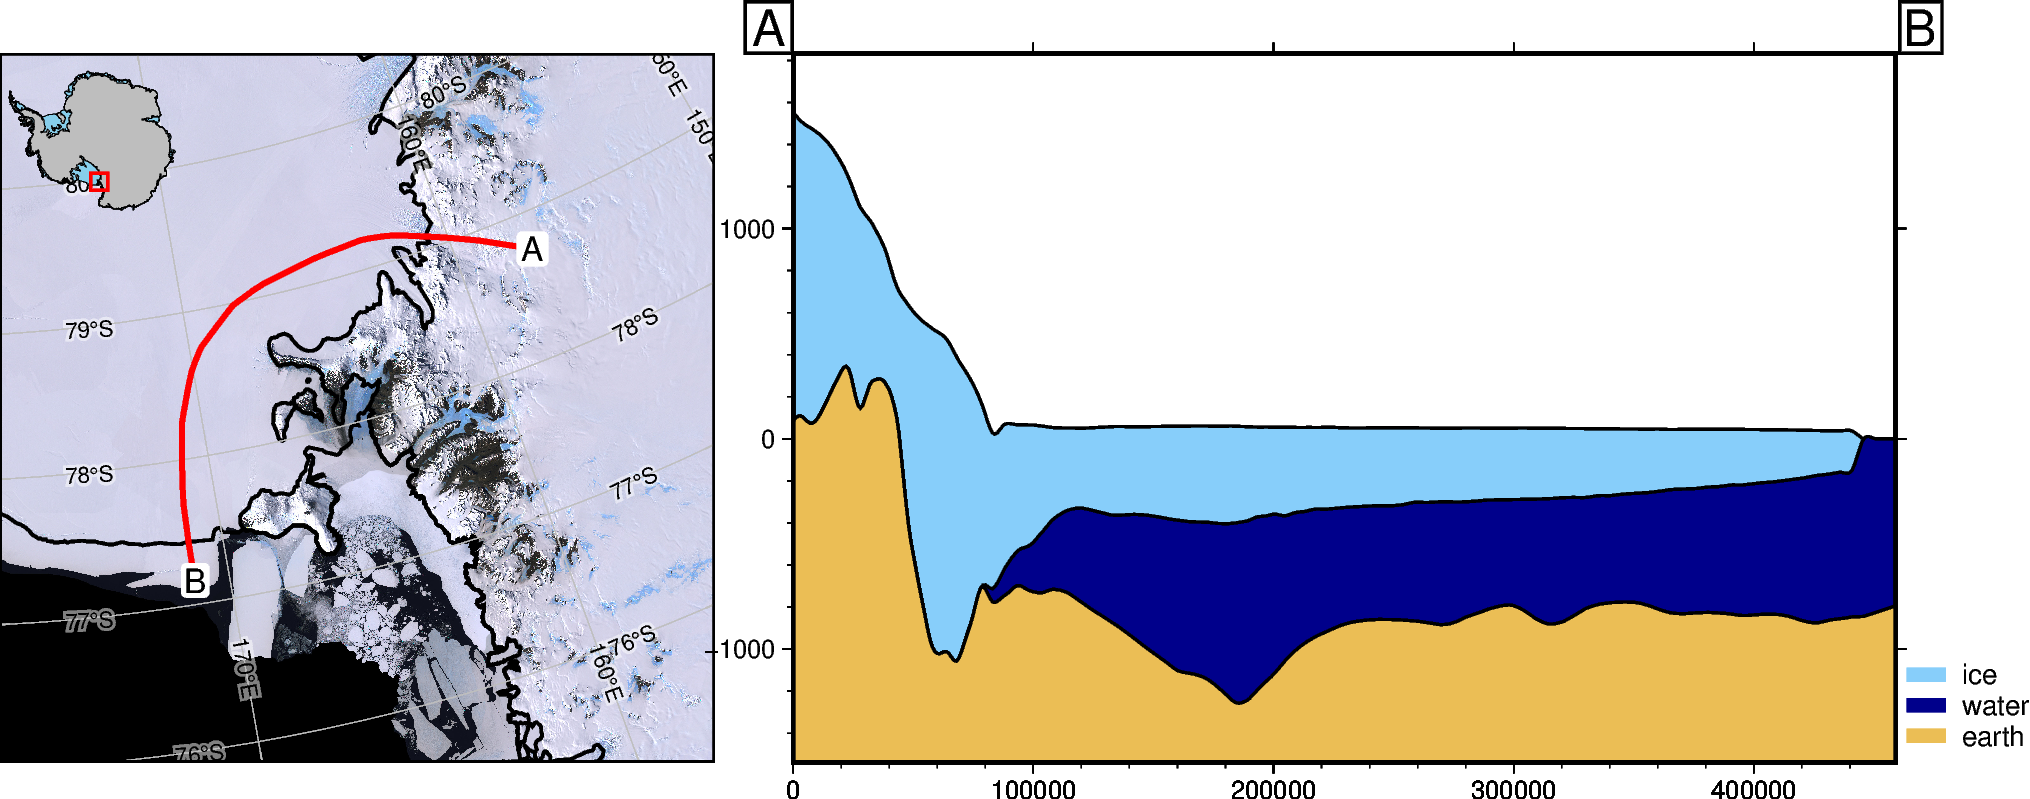

In [15]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    add_map=True,
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Add a graph of data
Sample and plot additional datasets along the same profile with `data_dict`. By default this includes gravity and magnetics.

gmtset [WARNING]: Representation of font type not recognized. Using default.


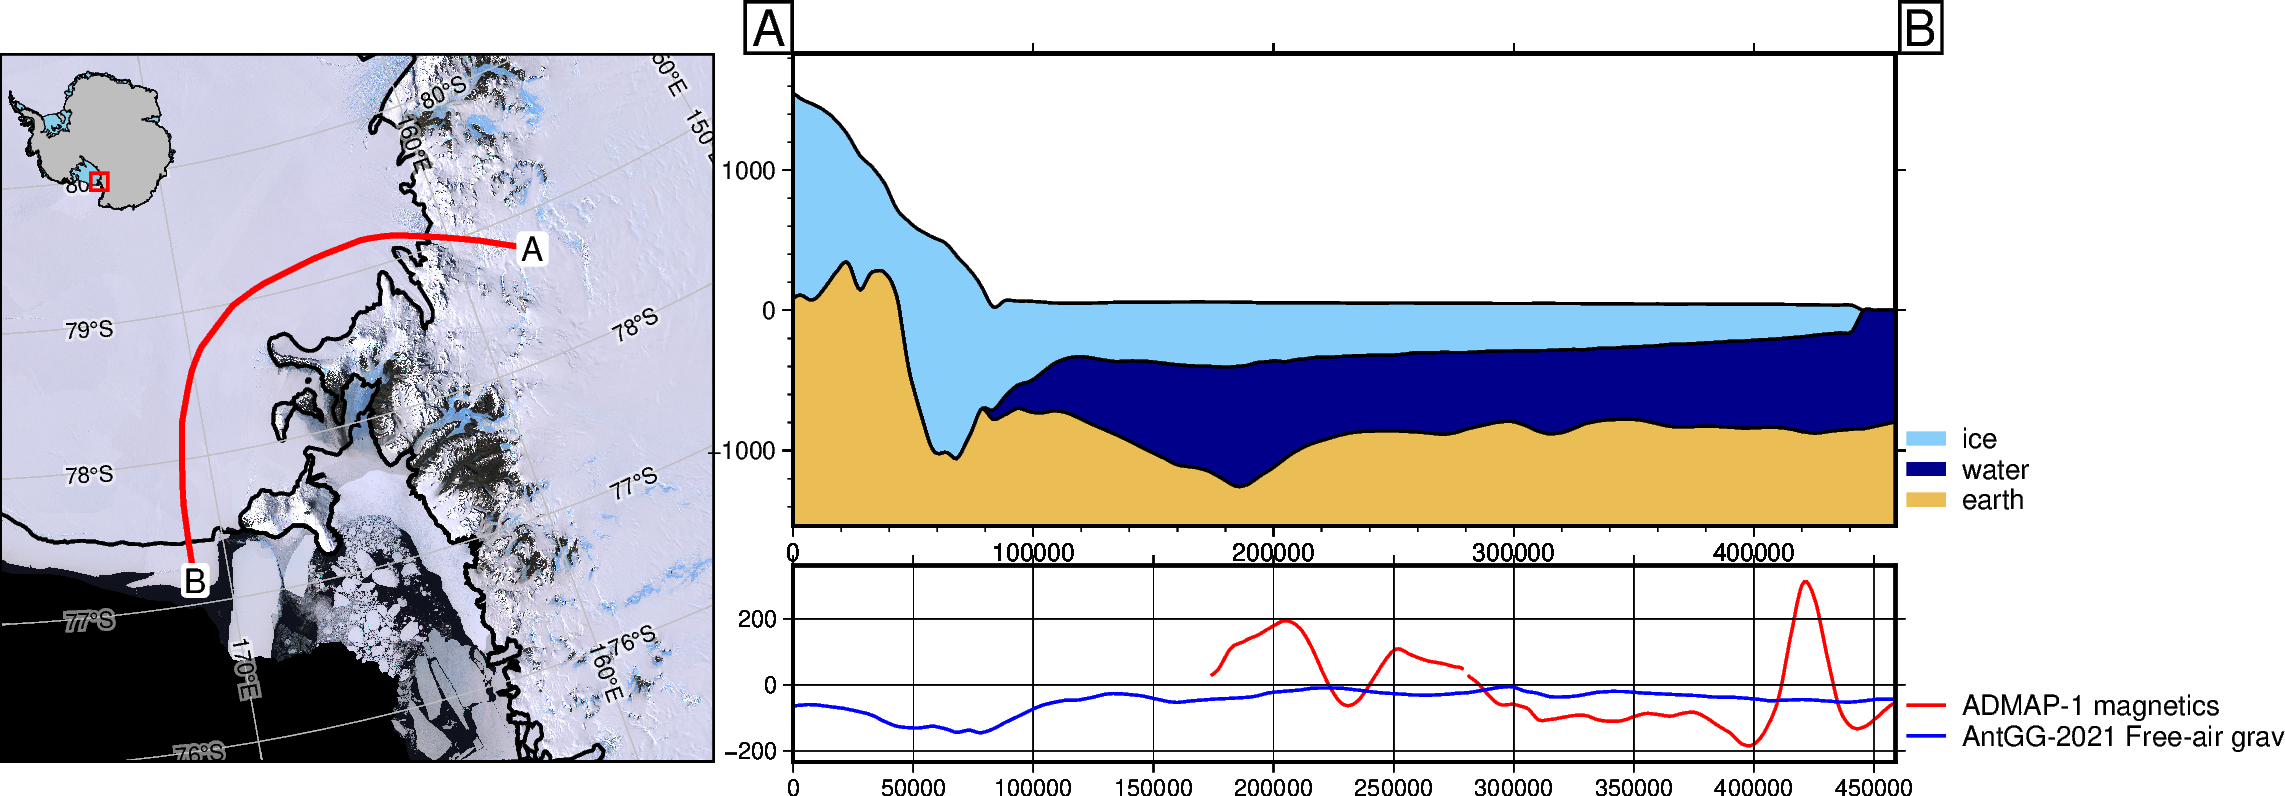

In [16]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    add_map=True,
    data_dict="default",
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
    save=True,  # save the plot to use in README
    path="../cover_fig.png",
)
fig.show(dpi=200)

## Change profile length
clip the profile (either end) based on distance

grdtrack [WARNING]: Some input points were outside the grid domain(s).
grdtrack [WARNING]: Some input points were outside the grid domain(s).
gmtset [WARNING]: Representation of font type not recognized. Using default.


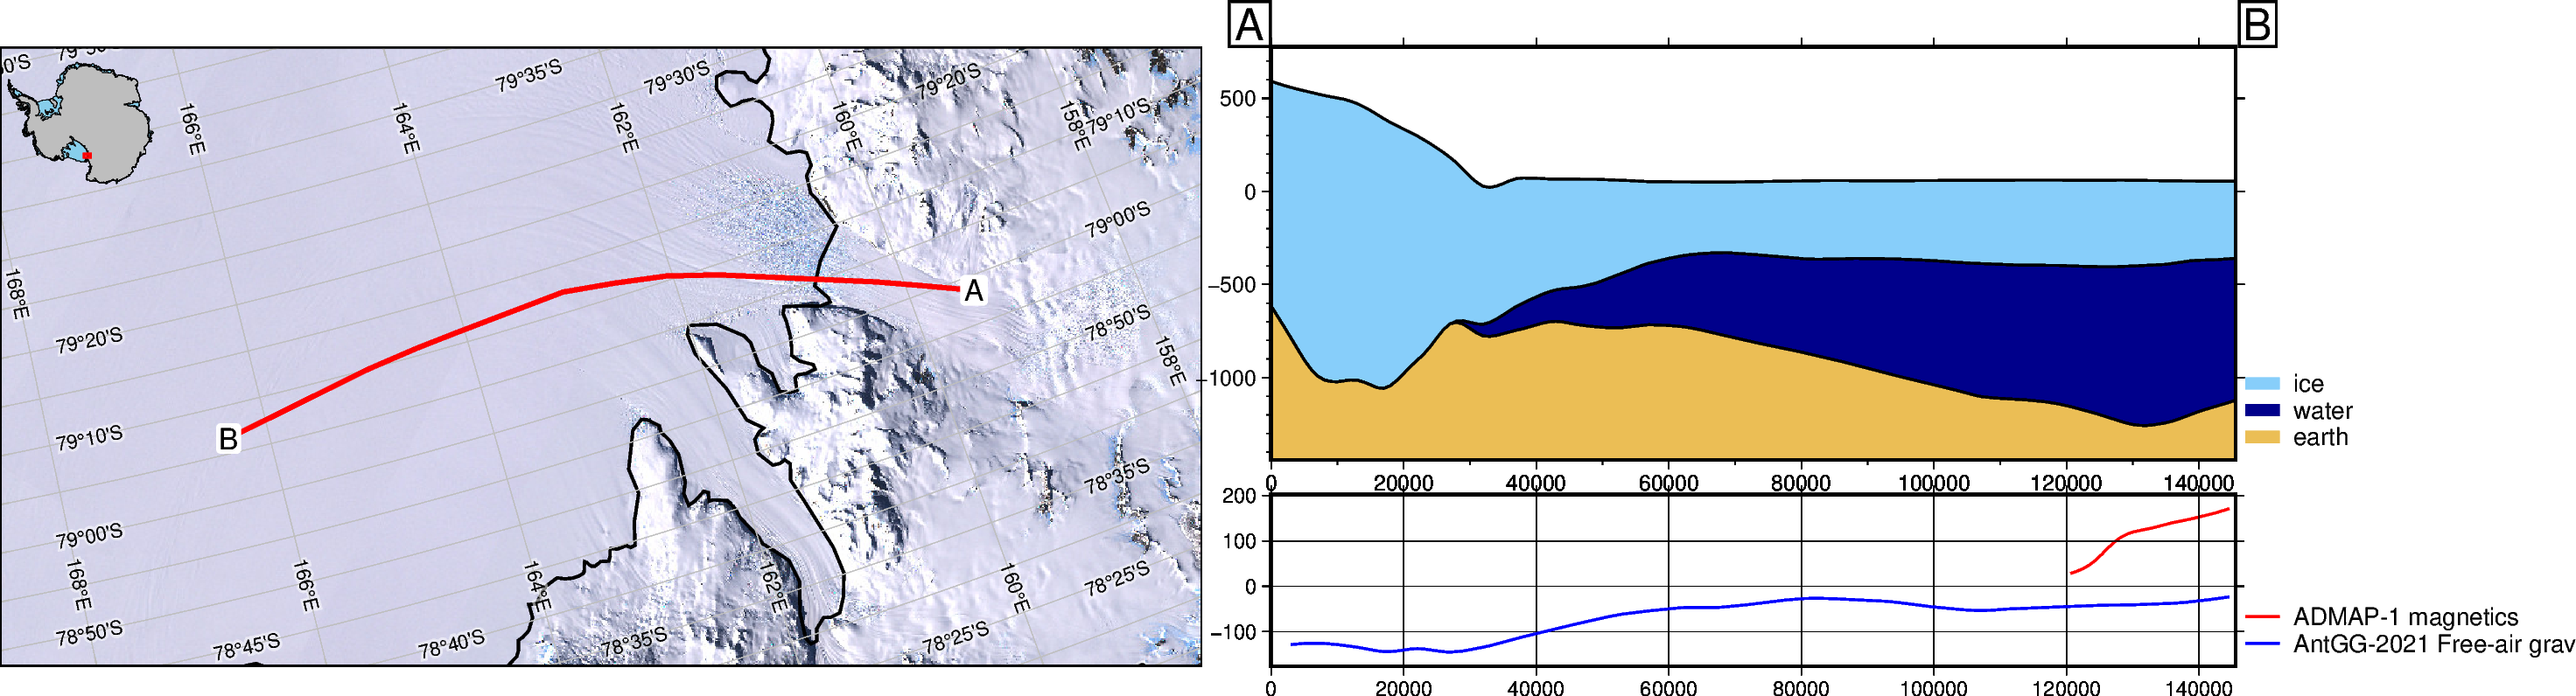

In [17]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    data_dict="default",
    add_map=True,
    min_dist=50e3,
    max_dist=200e3,
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Change sampling resolution
Change the resolution of the sampling with the parameter "num", which defaults to 1000 points along the line.

grdtrack [WARNING]: Some input points were outside the grid domain(s).
grdtrack [WARNING]: Some input points were outside the grid domain(s).
gmtset [WARNING]: Representation of font type not recognized. Using default.


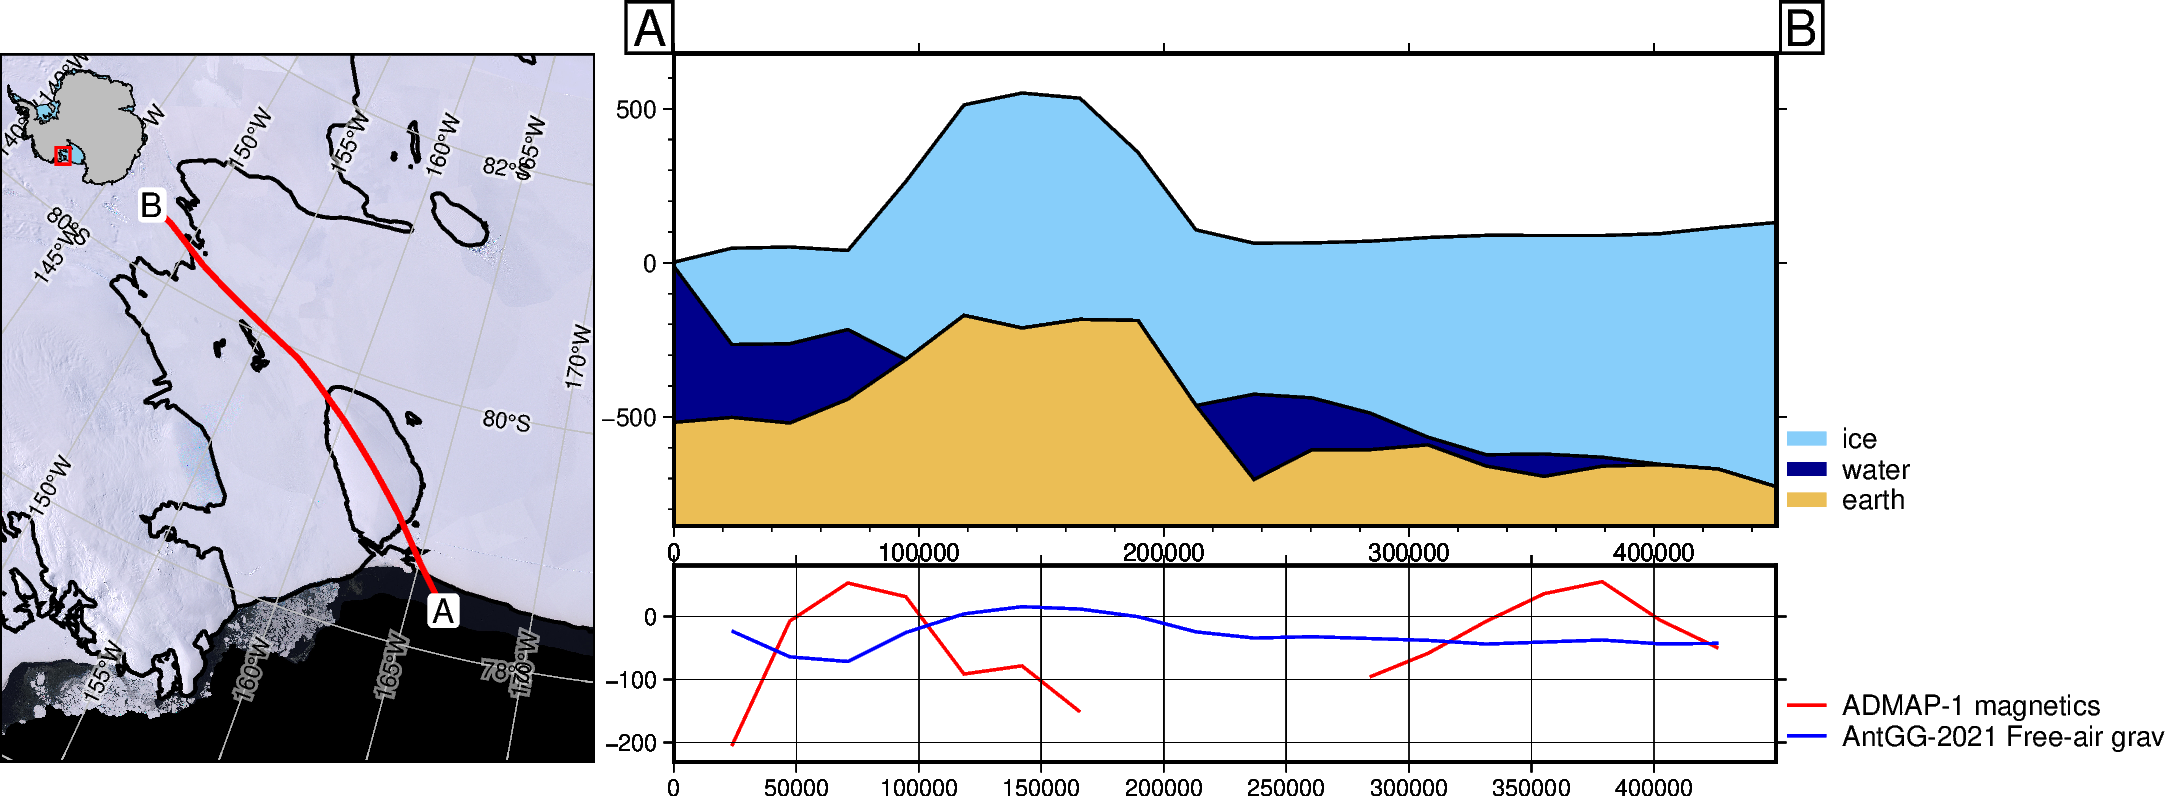

In [34]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp(
        "Roosevelt_Island",
    ),
    num=20,
    data_dict="default",
    add_map=True,
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Alter map properties

Use `map_background` to change the grid shown on the map. Here, instead of the default imagery, we will show the surface topography from bedmap2.

Also, use `subplot_orientation` to stack the plots vertically

gmtset [WARNING]: Representation of font type not recognized. Using default.


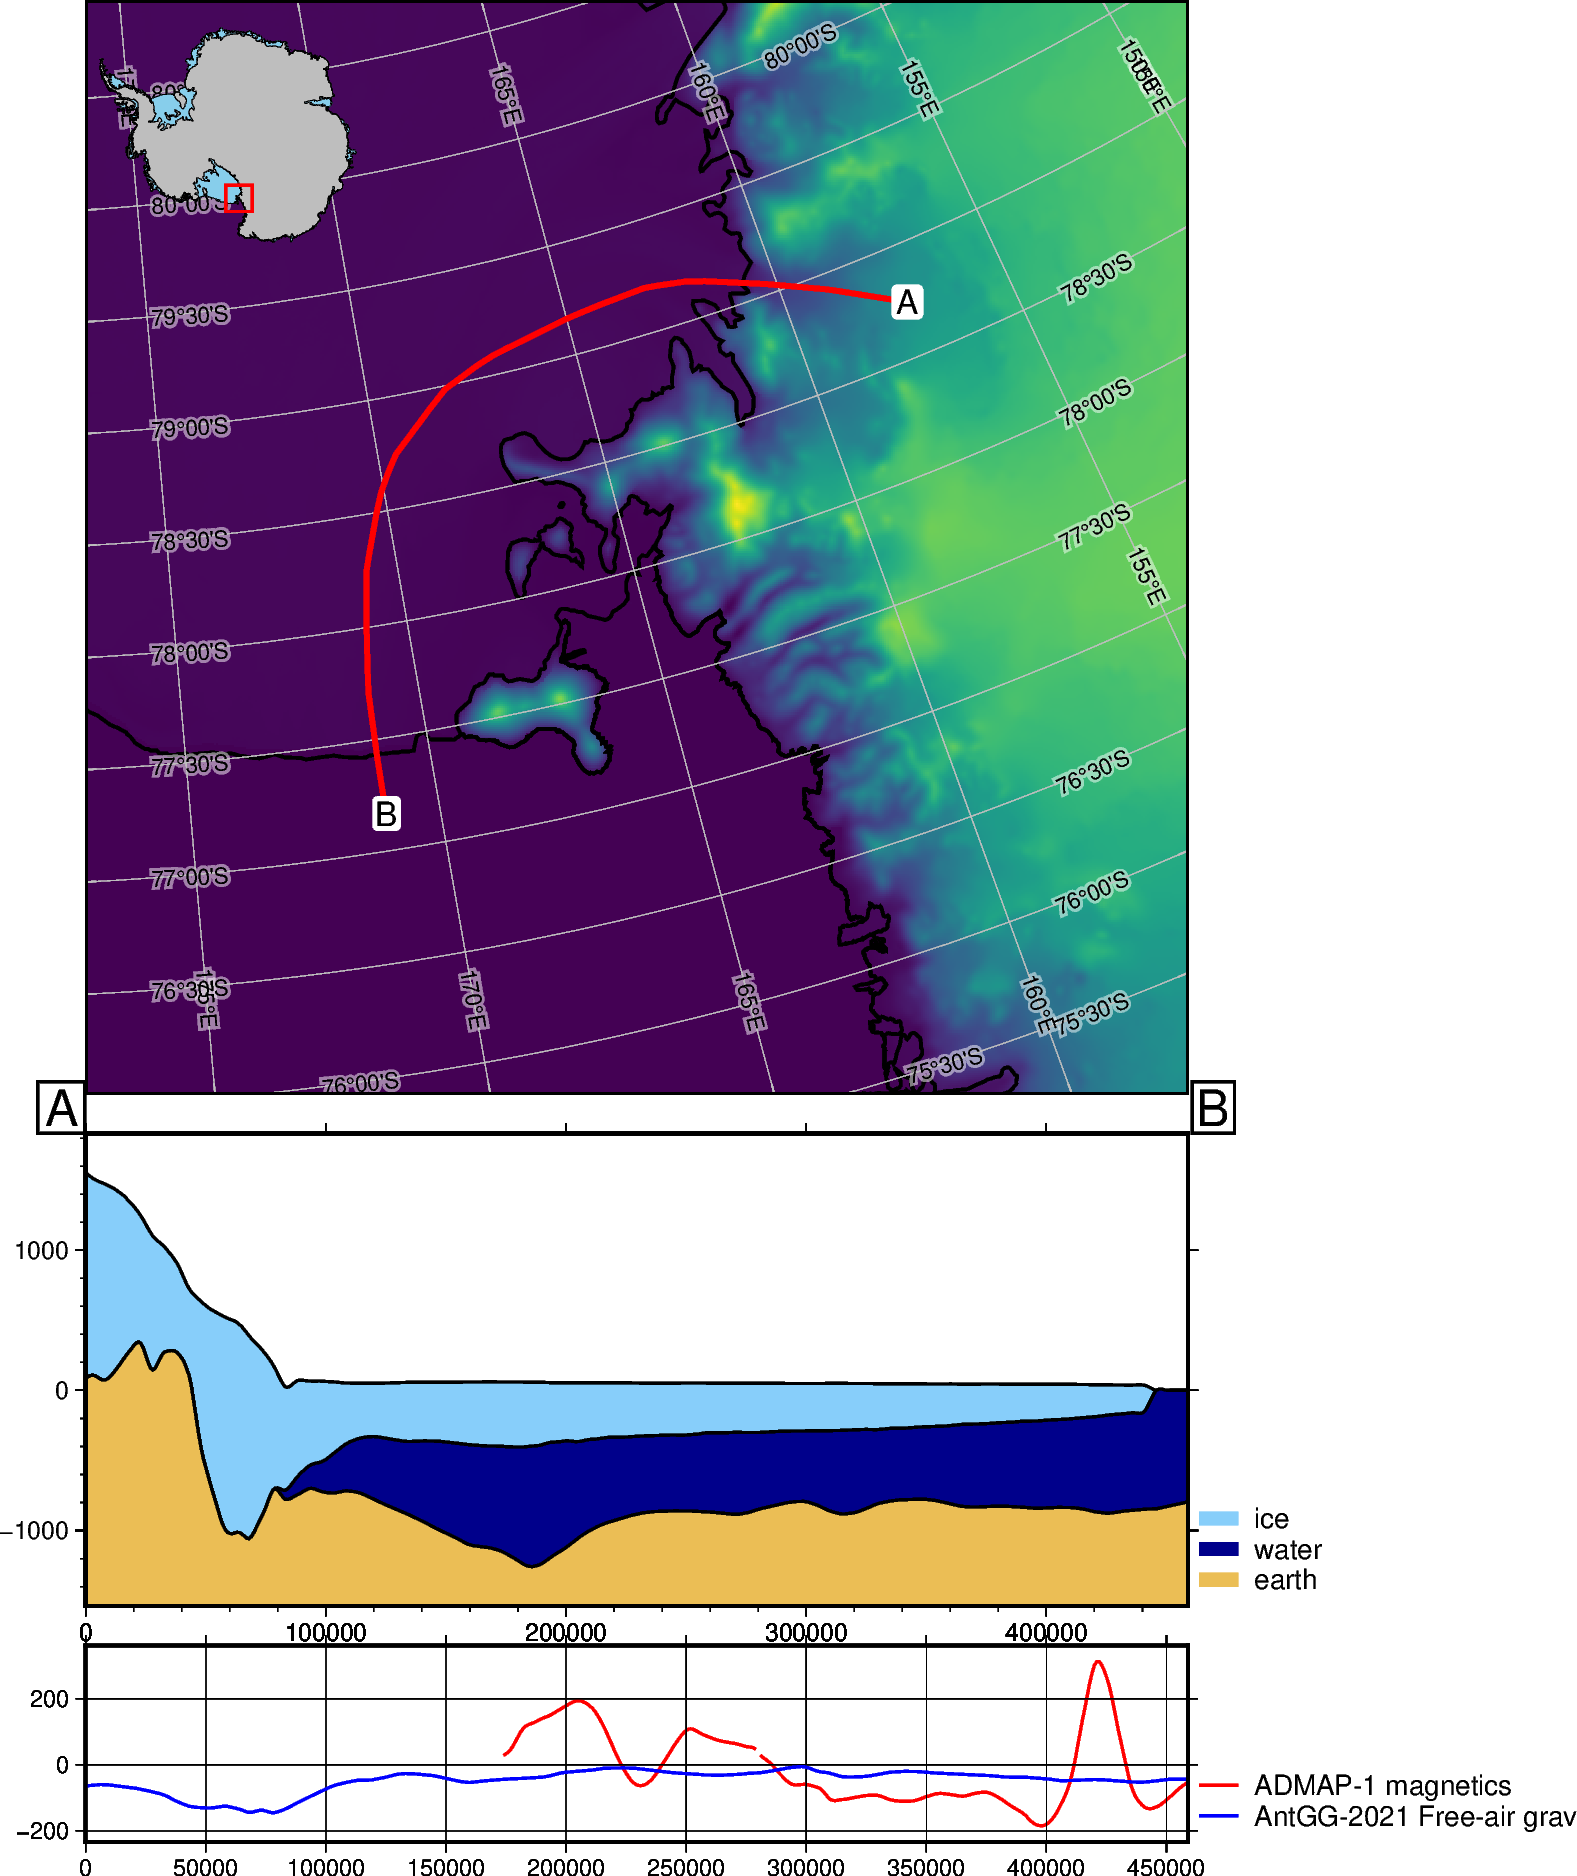

In [19]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    data_dict="default",
    add_map=True,
    map_background=fetch.bedmap2("surface", fill_nans=True),
    subplot_orientation="vertical",
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    hist=True,
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

Use `map_cmap` to change the maps colorscale

gmtset [WARNING]: Representation of font type not recognized. Using default.


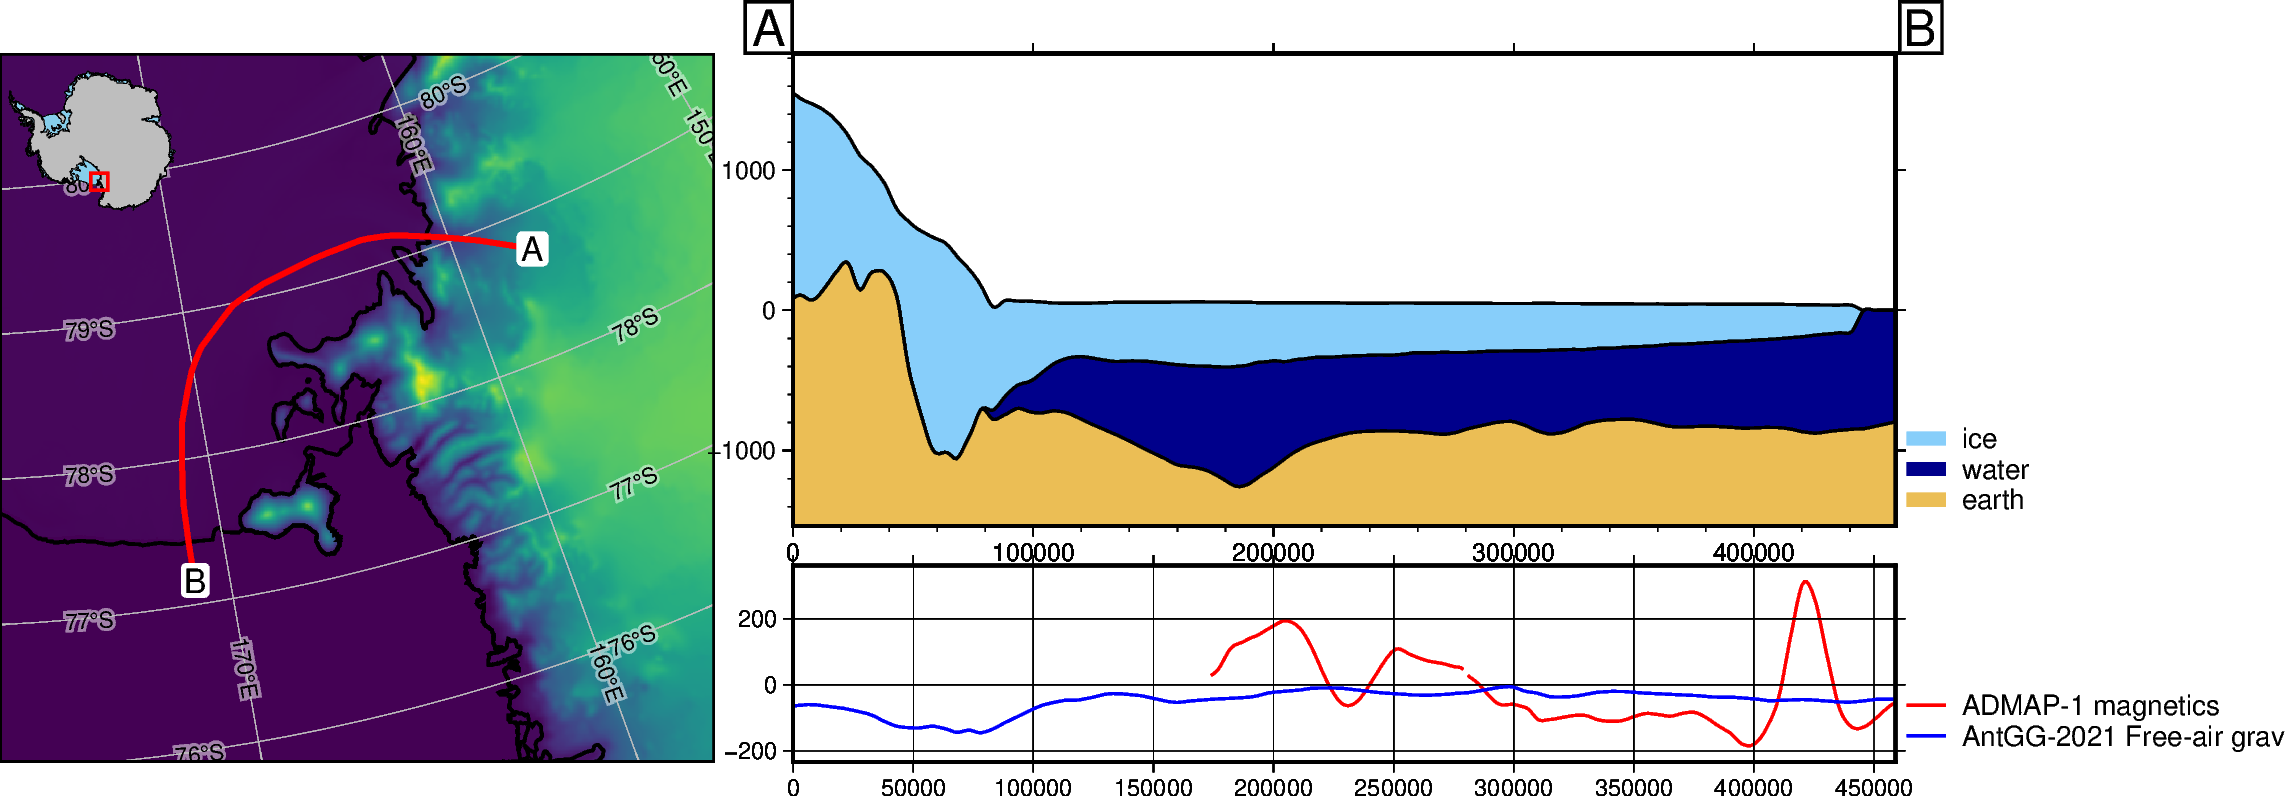

In [20]:
fig, _, _ = profiles.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Disco_deep_transect"),
    data_dict="default",
    add_map=True,
    map_background=fetch.bedmap2("surface", fill_nans=True),
    map_cmap="viridis",
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

Use `map_buffer` to change the level of zoom on the map. This is a percentage of total line distance, which defaults to 0.3 (130%) of profile length. So if the profile is 100km long, the default map will be 130km along the longest axis.

gmtset [WARNING]: Representation of font type not recognized. Using default.


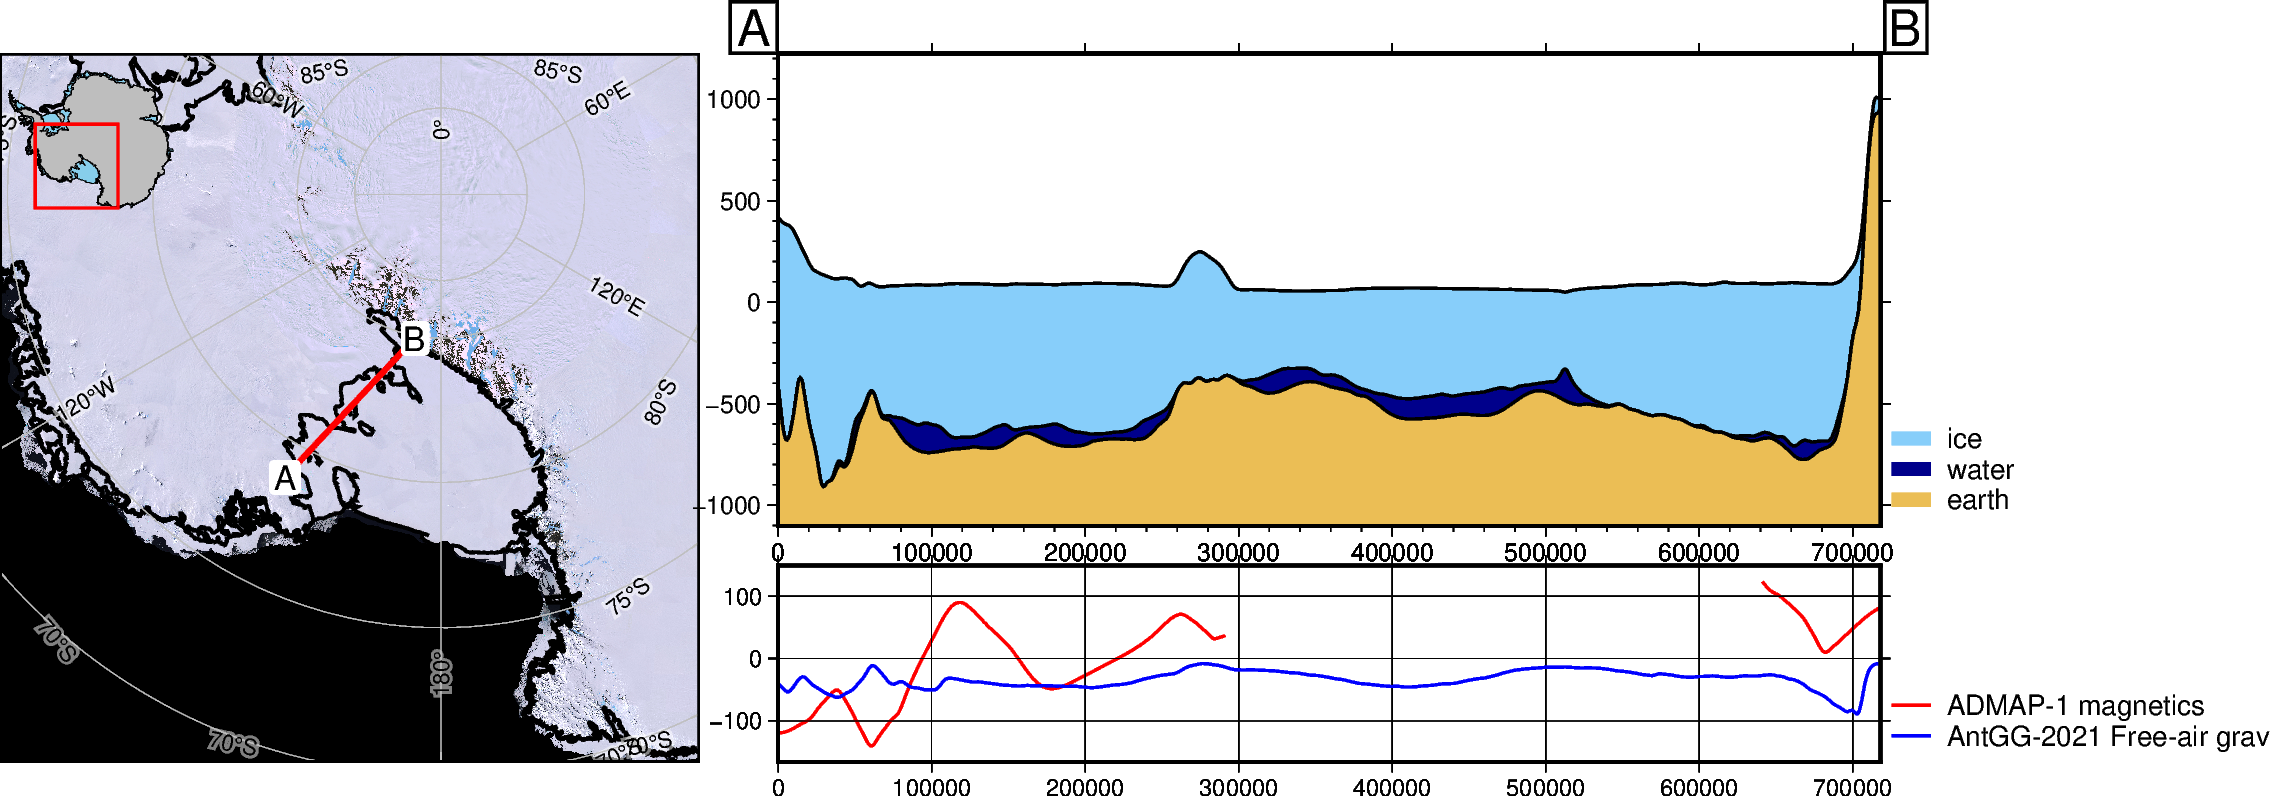

In [35]:
# define new profile endpoints
a = (-590e3, -1070e3)
b = (-100e3, -545e3)

fig, _, _ = profiles.plot_profile(
    method="points",
    start=a,
    stop=b,
    data_dict="default",
    add_map=True,
    map_buffer=1.5,
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Alter Cross-section properties

Use `layer_buffer` to alter the amount of whitespace above and below the cross-section layers, this defaults to 0.1 (10% of data spread added above/below)

Use `data_buffer` to alter the whitespace above and below data graph, defaults to 0.1 (10% of data spread added above/below) 

gmtset [WARNING]: Representation of font type not recognized. Using default.


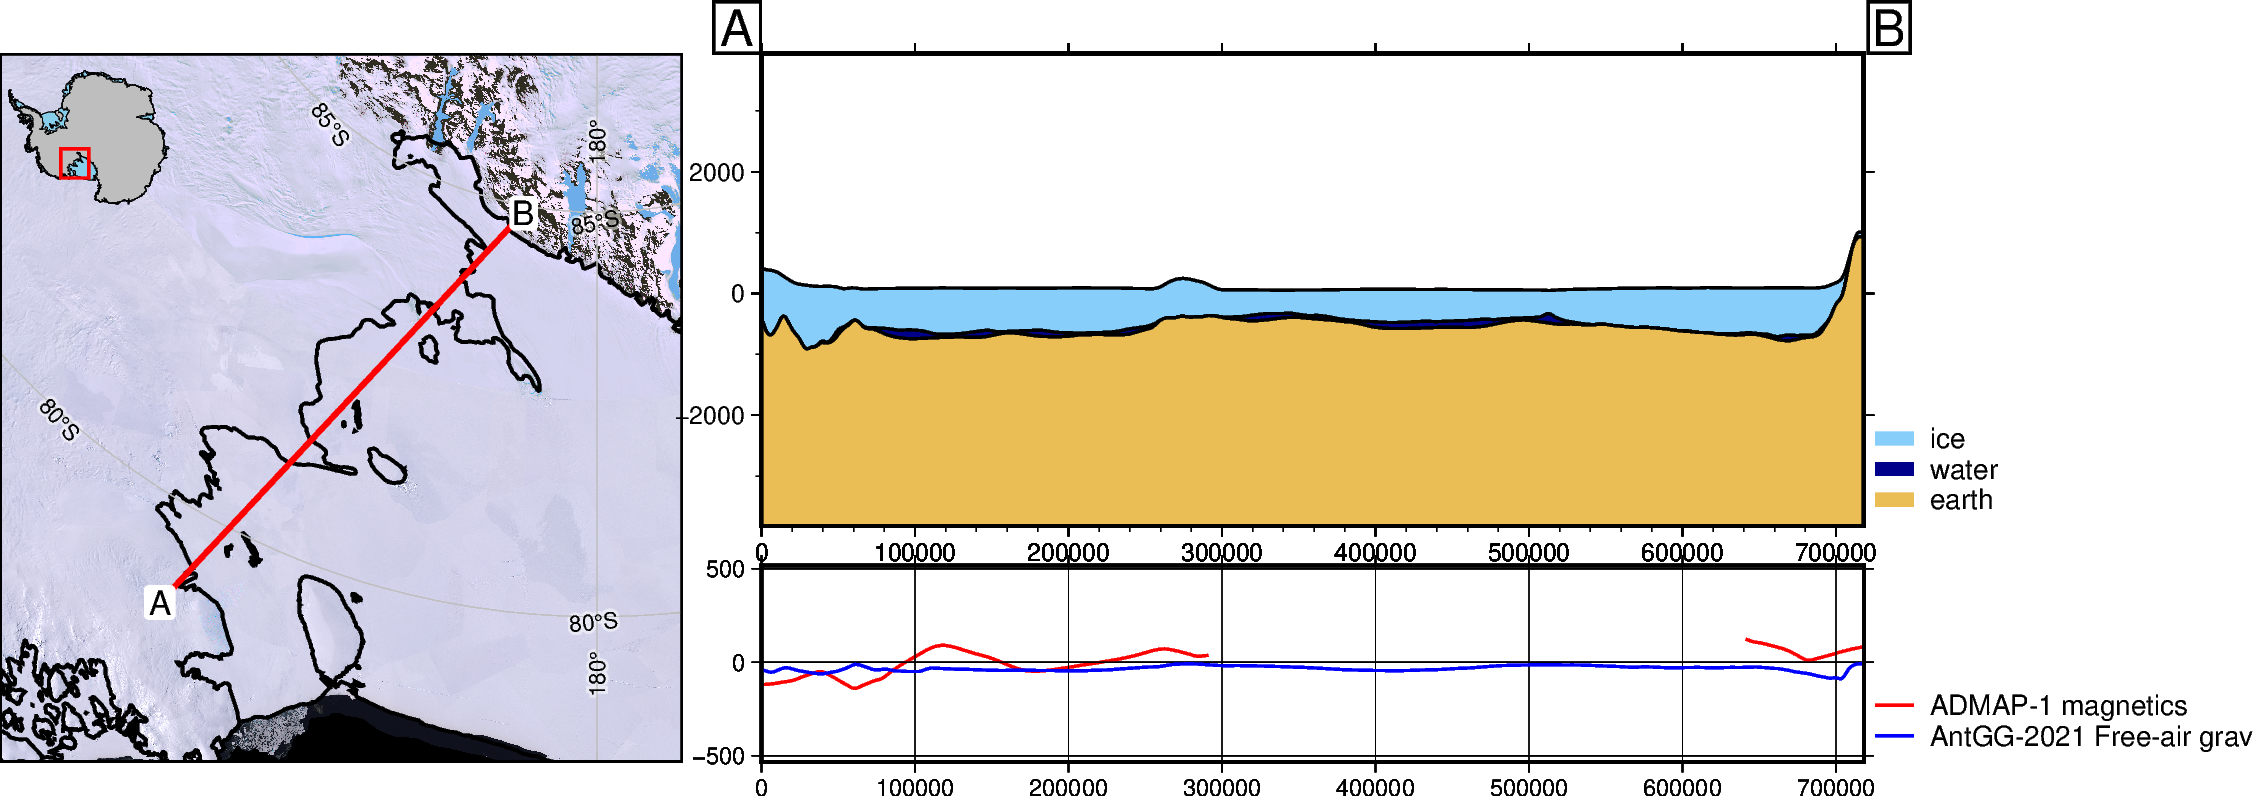

In [36]:
fig, _, _ = profiles.plot_profile(
    method="points",
    start=a,
    stop=b,
    data_dict="default",
    add_map=True,
    layer_buffer=1.5,
    data_buffer=1.5,
    legend_loc="JTR+jTR+o.2c/-6c",  # change the default legend location with GMT format
    layers_version="bedmap3",
    default_layers_spacing=5e3,  # for speed, use layers at 5km resolution
)
fig.show(dpi=200)

## Custom layers, datasets, and colors
The input for both the data and the layers are nested dictionaries, where each dictionary entry contains keys: 'name', 'grid', and 'color'.

Use the function, `profiles.make_data_dict()` to help create these dictionaries.
It takes 3 inputs, which are:
 * a list of names
 * a list of grids
    either geotiff/netcdf file names or xarray.DataArrays
 *  a list of colors.

For example, if you have a netcdf file 'ice_velocity.nc' which you want to plot as orange, you can make that into a dictionary with:
    `profiles.make_data_dict(['ice velocity'], ['ice_velocity.nc'], ['orange'])`

Optionally, you can use `Pooch.fetch` to help download and store dataset from urls, and easily load them.

See the functions in the module `polartoolkit.fetch` for examples and feel free to make a PR and add your datasets there.

In [24]:
# note, these datafile can be plotted at higher resolution by adding parameter 'spacing'
# to the 'fetch' function:
# fetch.gravity(version="antgg-update", anomaly_type="BA", spacing=1e3) will use a 1km
# version of the Bouguer gravity anomaly.
data_dict = profiles.make_data_dict(
    ["Bouguer gravity", "REMA surface elevation"],
    [
        fetch.gravity(
            version="antgg-2021",
            anomaly_type="BA",
        ).bouguer_anomaly,
        fetch.rema(version="1km"),
    ],
    ["purple", "red"],
    axes=[0, 1],
)

# get default bedmap3 layers
layers_dict = profiles.default_layers(
    version="bedmap3",
    spacing=5e3,
)

# get grid from basement topography
bed = fetch.bedmap3(layer="bed", spacing=5e3)
sed_thickness = fetch.sediment_thickness(version="tankersley-2022", spacing=5e3)
basement = utils.grd_compare(bed, sed_thickness, plot=False)[0]

# add dictionary entry of extra layer 'basement'
layers_dict["basement"] = {}
layers_dict["basement"]["name"] = "basement"
layers_dict["basement"]["grid"] = basement
layers_dict["basement"]["color"] = "chocolate"

gmtset [WARNING]: Representation of font type not recognized. Using default.


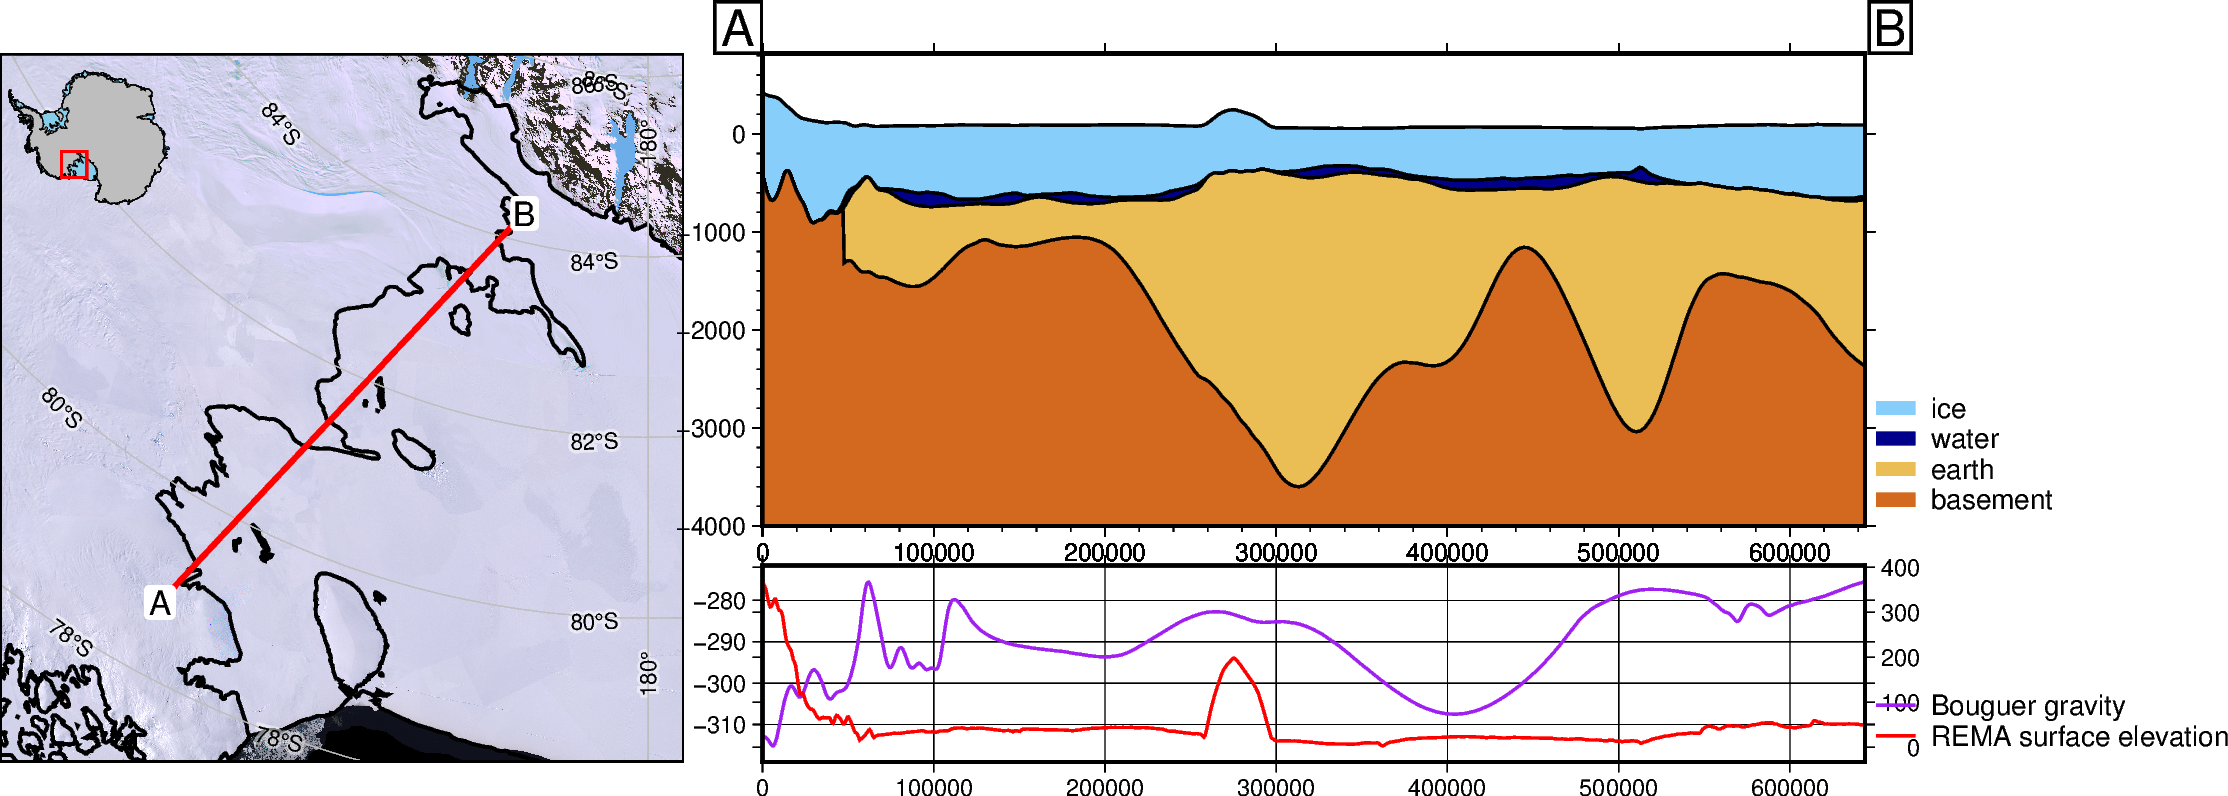

In [25]:
a = (-590e3, -1070e3)
b = (-150e3, -600e3)

fig, _, _ = profiles.plot_profile(
    "points",
    start=a,
    stop=b,
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    legend_loc="JTR+jTR+o.2c/-6.3c",  # change the default legend location
)
fig.show(dpi=200)

Control whether to fill gaps in the cross-section layers. Note that the additional layer 'basement', doesn't extend past the groundingline. By default, NaN's in any layer are set equal
to the layer above, causing the vertical line at ~100km.

gmtset [WARNING]: Representation of font type not recognized. Using default.


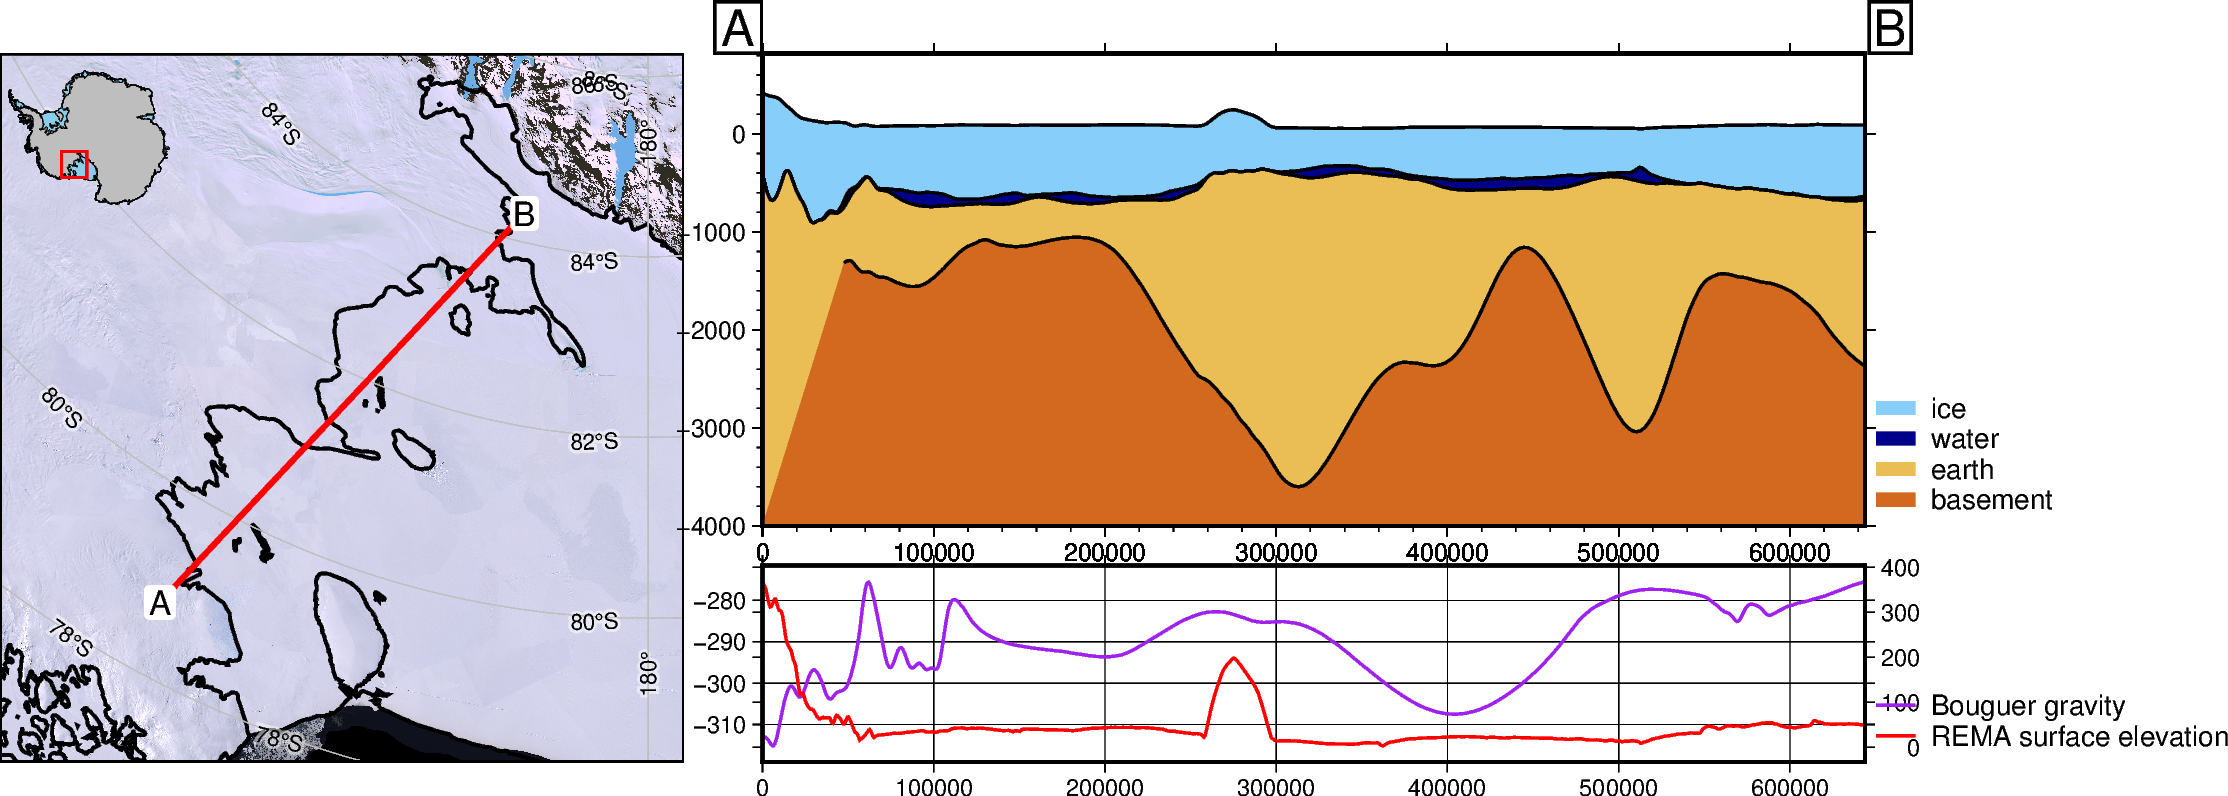

In [26]:
fig, _, _ = profiles.plot_profile(
    "points",
    start=a,
    stop=b,
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    fillnans=False,
    legend_loc="JTR+jTR+o.2c/-6.3c",  # change the default legend location
)
fig.show(dpi=200)